# Assignment 3

# Question1

In [1]:
import selenium
from selenium import webdriver
import time
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

from selenium.common.exceptions import StaleElementReferenceException,NoSuchElementException,ElementNotInteractableException,TimeoutException


import requests
import pandas as pd

In [2]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.amazon.in/')

In [3]:
g=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
g.send_keys('guitar')

In [4]:
s=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
s.click()

# Question2

In [5]:
guitar_url=[]
s=0
e=2
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        guitar_url.append(i.get_attribute('href'))  #to retrieve any link use get_attribute
        
    nexxt=driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[67]/div/div/span/a[3]')
    

In [6]:
len(guitar_url)

120

In [7]:
brandss=[]

for i in guitar_url[0:120]:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[44]/div/div[1]/div/table/tbody/tr[1]/td[2]/span')
        brandss.append(brand.text)
    except NoSuchElementException:
        brandss.append('-')

In [8]:
len(brandss)

120

In [9]:
prices=[]

for i in guitar_url[0:120]:
    driver.get(i)
    time.sleep(5)
    try:
        price=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[2]/div[1]/div/span[1]/span[2]/span[2]')
        prices.append(price.text)
    except NoSuchElementException:
        brandss.append('-')

In [11]:
len(prices)

70

In [13]:
returns=[]

for i in guitar_url[0:120]:
    driver.get(i)
    time.sleep(5)
    try:
        returnn=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[22]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/a')
        returns.append(returnn.text)
    except NoSuchElementException:
        brandss.append('-')

In [14]:
len(returns)

66

In [15]:
deliverys=[]

for i in guitar_url[0:120]:
    driver.get(i)
    time.sleep(5)
    try:
        deliver=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[9]/div[1]/div/div/div/span/span')
        deliverys.append(deliver.text)
    except NoSuchElementException:
        brandss.append('-')

In [16]:
len(deliverys)

70

In [17]:
stocks=[]

for i in guitar_url[0:120]:
    driver.get(i)
    time.sleep(5)
    try:
        stock=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[4]/div/div[1]/span')
        stocks.append(stock.text)
    except NoSuchElementException:
        brandss.append('-')

In [18]:
len(stocks)

70

In [22]:
guitar_url=guitar_url[:66]

In [23]:
brandss=brandss[:66]

In [24]:
prices=prices[:66]

In [25]:
returns=returns[:66]

In [26]:
deliverys=deliverys[:66]

In [27]:
stocks=stocks[:66]

In [28]:
df=pd.DataFrame({'URL':guitar_url,'Brand':brandss,'Price':prices,'Return_policy':returns,'Delivery':deliverys,'Stock':stocks})

In [29]:
df

,URL,Brand,Price,Return_policy,Delivery,Stock
0,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,"6,899",7 days Replacement,"Friday, 28 April",In stock
1,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,VAULT,"7,299",7 days Replacement,"Monday, 24 April",In stock
2,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,"4,999",7 days Replacement,"Friday, 28 April",In stock
3,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Medellin,"1,949",7 days Replacement,"Friday, 28 April",In stock
4,https://www.amazon.in/Juarez-Acoustic-Cutaway-...,JUAREZ,"1,999",7 days Replacement,"Tuesday, 25 April",In stock
...,...,...,...,...,...,...
61,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,VAULT,"6,899",7 days Replacement,"Friday, 28 April",In stock
62,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Kadence,"2,544",7 days Returnable,"Tuesday, 25 April",In stock
63,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,Medellin,"4,499",7 days Returnable,April 27 - 29,
64,https://www.amazon.in/Juarez-Acoustic-Cutaway-...,JUAREZ,"2,199",7 days Returnable,"Thursday, 27 April",In stock


In [30]:
df.to_csv(r'C:\Users\arunk\OneDrive\Desktop\guitarurls.csv')

In [31]:
driver.close()

# Question3

In [32]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')

In [33]:
driver.get('https://images.google.com/')

In [34]:
d=driver.find_element(By.CLASS_NAME,'gLFyf')
d.send_keys('Fruits')

In [35]:
s=driver.find_element(By.CLASS_NAME,'Tg7LZd')
s.click()

In [36]:
images=[]
s=0
e=1
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in url:
        images.append(i.get_attribute('src'))  #to retrieve any link use get_attribute

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
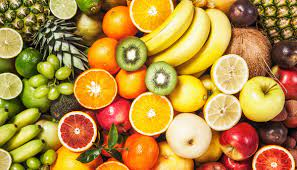
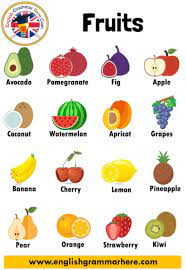
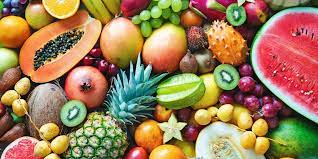
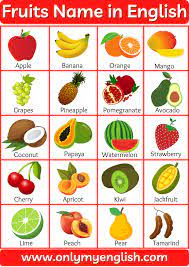
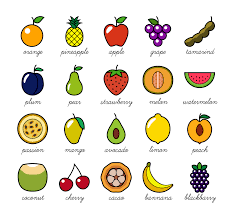
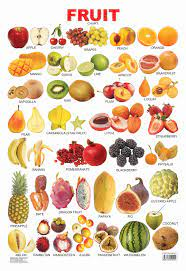
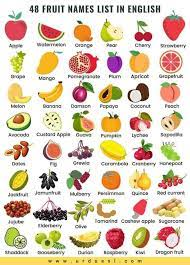
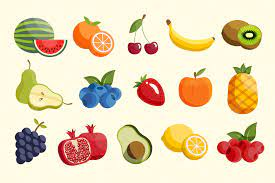
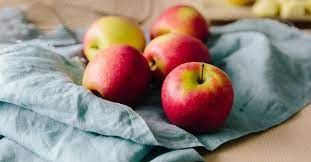
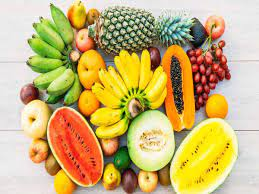
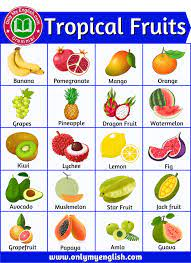
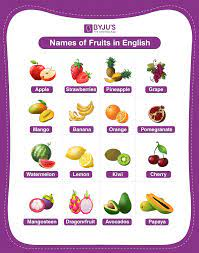
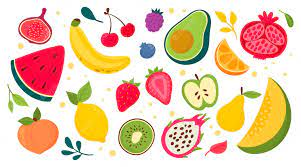
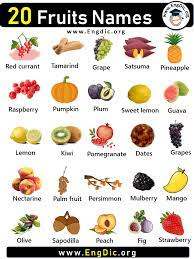
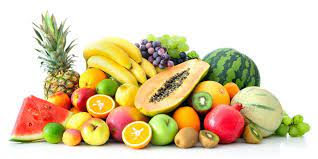
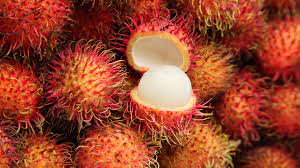
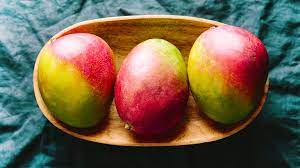
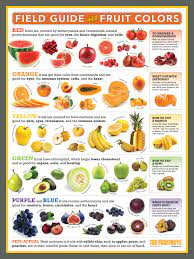
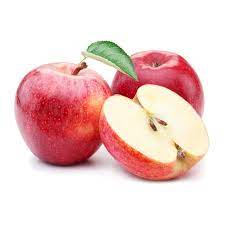
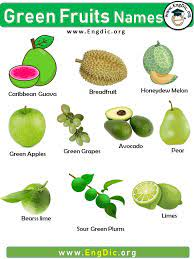

In [37]:
images

In [43]:
df=pd.DataFrame({'Fruits':images})

In [72]:
fruits=df.head(10)

In [73]:
fruits

,Cakes Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [45]:
driver.close()

In [46]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://images.google.com/')

In [47]:
d=driver.find_element(By.CLASS_NAME,'gLFyf')
d.send_keys('cars')
s=driver.find_element(By.CLASS_NAME,'Tg7LZd')
s.click()

In [48]:
cars=[]
s=0
e=1
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in url:
        cars.append(i.get_attribute('src'))  #to retrieve any link use get_attribute
    

In [49]:
df=pd.DataFrame({"Cars images":cars})

In [74]:
cars=df.head(10)

In [75]:
cars

,Cakes Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [51]:
driver.close()

In [52]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://images.google.com/')

In [53]:
d=driver.find_element(By.CLASS_NAME,'gLFyf')
d.send_keys('Machine Learning')

In [54]:
s=driver.find_element(By.CLASS_NAME,'Tg7LZd')
s.click()

In [55]:
guitar=[]
s=0
e=1
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in url:
        guitar.append(i.get_attribute('src'))  #to retrieve any link use get_attribute
    

In [56]:
df=pd.DataFrame({'Guitar images':guitar})

In [76]:
guitar=df.head(10)

In [77]:
guitar

,Cakes Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [59]:
driver.close()

In [60]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://images.google.com/')


In [61]:
d=driver.find_element(By.CLASS_NAME,'gLFyf')
d.send_keys('guitar')
s=driver.find_element(By.CLASS_NAME,'Tg7LZd')
s.click()

In [62]:
guitar=[]
s=0
e=1
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in url:
        guitar.append(i.get_attribute('src'))  #to retrieve any link use get_attribute
    

In [63]:
df=pd.DataFrame({'Guitar images':guitar})

In [78]:
guitar=df.head(10)

In [79]:
guitar

,Cakes Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [65]:
driver.close()

In [66]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://images.google.com/')
d=driver.find_element(By.CLASS_NAME,'gLFyf')
d.send_keys('cakes')

In [67]:
s=driver.find_element(By.CLASS_NAME,'Tg7LZd')
s.click()

In [68]:
cakes=[]
s=0
e=1
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
    for i in url:
        cakes.append(i.get_attribute('src'))  #to retrieve any link use get_attribute
    

In [69]:
df=pd.DataFrame({'Cakes Images':cakes})

In [80]:
cakes=df.head(10)

In [81]:
cakes

,Cakes Images
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


In [71]:
driver.close()

# Question4

In [82]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.flipkart.com/')
d=driver.find_element(By.CLASS_NAME,'_3704LK')
d.send_keys('s22')


In [83]:
s=driver.find_element(By.XPATH,'/html/body/div/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
s.click()

In [90]:
phone_url=[]
s=0
e=1
for p in range(s,e):
    url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
    for i in url:
        phone_url.append(i.get_attribute('href')) 

In [91]:
phone_url

['https://www.flipkart.com/samsung-galaxy-s22-5g-phantom-black-256-gb/p/itm6ed35db79b611?pid=MOBGGG2YDHGAG9HW&lid=LSTMOBGGG2YDHGAG9HWG3ZSQN&marketplace=FLIPKART&q=s22&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=db7bcfa9-00df-4ca4-ba62-aff39d3ba2a1.MOBGGG2YDHGAG9HW.SEARCH&ppt=hp&ppn=homepage&ssid=5v31j6brvk0000001682157068440&qH=b91952a3f6793fb7',
 'https://www.flipkart.com/samsung-galaxy-s22-5g-phantom-white-128-gb/p/itm7f791a71355ba?pid=MOBGGG2YBHNYTAFZ&lid=LSTMOBGGG2YBHNYTAFZA0F2TS&marketplace=FLIPKART&q=s22&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=db7bcfa9-00df-4ca4-ba62-aff39d3ba2a1.MOBGGG2YBHNYTAFZ.SEARCH&ppt=hp&ppn=homepage&ssid=5v31j6brvk0000001682157068440&qH=b91952a3f6793fb7',
 'https://www.flipkart.com/samsung-galaxy-s22-5g-phantom-black-128-gb/p/itmed7646365e897?pid=MOBGGG2YNYPZZN33&lid=LSTMOBGGG2YNYPZZN336JZNUB&marketplace=FLIPKART&q=s22&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1=search&fm=organic&ii

In [92]:
d=[]

titletags=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
for i in titletags:
    title=i.text
    d.append(title)

In [93]:
d

['SAMSUNG Galaxy S22 5G (Phantom Black, 256 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Bora Purple, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Green, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Green, 256 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Green, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom White, 256 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom Black, 256 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom White, 256 GB)',
 'SAMSUNG Galaxy S22 5G (Green, 256 GB)',
 'SAMSUNG Galaxy S22 5G (White, 128 GB)',
 'SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)',
 'SAMSUNG Galaxy S22 Plus 5G (Phantom Black, 128 GB)',
 'SAMSUNG Galaxy S22 Plus 5G (Green, 128 GB)',
 'SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 512 GB)',
 'SAMSUNG Galaxy S22 Plus 5G (Green, 256 GB)',
 'SAMSUNG Galaxy S22 Ultra 5G (Green, 256 GB)',
 'SAMSUNG Galaxy S22 Ultra 5G (Burgundy

In [94]:
df=pd.DataFrame({'Brand, Smartphone_name, Colour, ROM':d})

In [95]:
df

,"Brand, Smartphone_name, Colour, ROM"
0,"SAMSUNG Galaxy S22 5G (Phantom Black, 256 GB)"
1,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)"
2,"SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)"
3,"SAMSUNG Galaxy S22 5G (Bora Purple, 128 GB)"
4,"SAMSUNG Galaxy S22 5G (Green, 128 GB)"
5,"SAMSUNG Galaxy S22 5G (Green, 256 GB)"
6,"SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)"
7,"SAMSUNG Galaxy S22 5G (Green, 128 GB)"
8,"SAMSUNG Galaxy S22 5G (Phantom White, 256 GB)"
9,"SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)"


In [97]:
driver.close()

# Question5

In [98]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.google.com/maps/@28.6162944,77.0605056,12z')

In [99]:
d=driver.find_element(By.ID,'searchboxinput')
d.send_keys('jaipur')

In [100]:
s=driver.find_element(By.CLASS_NAME,'pzfvzf')
s.click()

In [101]:
driver.close()

# Question6

In [102]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.digit.in/')

In [103]:
d=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[5]/span')
d.click()

In [105]:
g=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[5]/div[2]/div/div[2]/div/ul[3]/li[4]/a')
g.click()

# Question7

In [106]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.forbes.com/?sh=5220b2802254')

In [107]:
c=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div')
c.click()

In [109]:
b=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[1]')
b.click()

In [110]:
w=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]')
w.click()

In [111]:
name=[]
names=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for n in names:
    bb=n.text
    name.append(bb)

In [112]:
name

['Bernard Arnault & family',
 '74',
 'LVMH',
 '',
 'Elon Musk',
 '51',
 'Tesla, SpaceX',
 '',
 'Jeff Bezos',
 '59',
 'Amazon',
 '',
 'Larry Ellison',
 '78',
 'Oracle',
 '',
 'Warren Buffett',
 '92',
 'Berkshire Hathaway',
 '',
 'Bill Gates',
 '67',
 'Microsoft',
 '',
 'Michael Bloomberg',
 '81',
 'Bloomberg LP',
 '',
 'Carlos Slim Helu & family',
 '83',
 'Telecom',
 '',
 'Mukesh Ambani',
 '65',
 'Diversified',
 '',
 'Steve Ballmer',
 '67',
 'Microsoft',
 '',
 'Francoise Bettencourt Meyers & family',
 '69',
 "L'Oréal",
 '',
 'Larry Page',
 '50',
 'Google',
 '',
 'Amancio Ortega',
 '87',
 'Zara',
 '',
 'Sergey Brin',
 '49',
 'Google',
 '',
 'Zhong Shanshan',
 '68',
 'Beverages, pharmaceuticals',
 '',
 'Mark Zuckerberg',
 '38',
 'Facebook',
 '',
 'Charles Koch',
 '87',
 'Koch Industries',
 '',
 'Julia Koch & family',
 '60',
 'Koch Industries',
 '',
 'Jim Walton',
 '74',
 'Walmart',
 '',
 'Rob Walton',
 '78',
 'Walmart',
 '',
 'Alice Walton',
 '73',
 'Walmart',
 '',
 'David Thomson & famil

In [115]:
driver.close()

# Question8

In [116]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.youtube.com/')

In [117]:
y=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-browse/ytd-two-column-browse-results-renderer/div[1]/ytd-rich-grid-renderer/div[6]/ytd-rich-grid-row[2]/div/ytd-rich-item-renderer[1]/div/ytd-rich-grid-media/div[1]/div[2]/div[1]/h3/a/yt-formatted-string')
y.click()

In [118]:
comments=[]


In [119]:
comment=driver.find_elements(By.XPATH,'//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
for n in comment:
    nn=n.text
    comments.append(nn)

In [120]:
df=pd.DataFrame({'Comments':comments})

In [121]:
df.head(500)

,Comments
0,"I had a Pressa Canario, a breed often feared a..."
1,My grandfather had a wolf dog growing up named...
2,Being an owner of 5 of these breeds and have r...
3,Most of these dogs were shown being trained fo...
4,Wasn’t expecting the German Shepard to be at t...
...,...
495,But is it banned in Bermuda?
496,"I breed Boerboels ,Rottweilers and German Sh..."
497,What does the Bermuda have with every breed of...
498,"7:58. How do you just say ""weighs up to 50 to ..."


# Question9

In [122]:
driver=webdriver.Chrome(r'C:\Users\arunk\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('https://www.hostelworld.com/')

In [123]:
l=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
l.send_keys('london')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input"}
  (Session info: chrome=112.0.5615.121)
Stacktrace:
Backtrace:
	(No symbol) [0x006CDCE3]
	(No symbol) [0x006639D1]
	(No symbol) [0x00574DA8]
	(No symbol) [0x005A019F]
	(No symbol) [0x005A03AB]
	(No symbol) [0x005CEE62]
	(No symbol) [0x005BAF14]
	(No symbol) [0x005CD57C]
	(No symbol) [0x005BACC6]
	(No symbol) [0x00596F68]
	(No symbol) [0x005980CD]
	GetHandleVerifier [0x00943832+2506274]
	GetHandleVerifier [0x00979794+2727300]
	GetHandleVerifier [0x0097E36C+2746716]
	GetHandleVerifier [0x00776690+617600]
	(No symbol) [0x0066C712]
	(No symbol) [0x00671FF8]
	(No symbol) [0x006720DB]
	(No symbol) [0x0067C63B]
	BaseThreadInitThunk [0x75197D49+25]
	RtlInitializeExceptionChain [0x7733B74B+107]
	RtlClearBits [0x7733B6CF+191]
